In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import statistics as stats
import time

In [2]:
#Read CSV files
Clean_data="clean_data.csv"
Merged_df=pd.read_csv(Clean_data,encoding="ISO-8859-1",sep=";")
Merged_df

,Team,Twitter_Compound_Score,Region,Wins,Losses,Win_Rate,Youtube_Compound_Score,Subscriber_Count,View_Count
0,100 Thieves,0.172566,North America,13,6,0.684211,0.351237,323071,35207210
1,Cloud9,0.138294,North America,12,8,0.600000,-0.018238,88420,6987846
2,Clutch Gaming,0.217552,North America,11,9,0.550000,0.249024,10902,532957
3,Counter Logic Gaming,0.311433,North America,7,11,0.388889,0.127185,34748,1729011
4,Echo Fox,0.260797,North America,12,7,0.631579,0.121082,177315,12217267
5,FC Schalke 04 Esports,-0.094096,Europe,7,11,0.388889,0.193417,9937,850219
6,FlyQuest,0.249222,North America,6,12,0.333333,0.274111,21116,2766857
7,Fnatic,0.221487,Europe,14,4,0.777778,0.200500,3619,217151
8,G2 Esports,0.236911,Europe,12,7,0.631579,0.158916,22094,1331206
9,Giants,0.262449,Europe,7,11,0.388889,0.012209,20320,1518110


In [3]:
Average_Compound_Score = []
for i,row in Merged_df.iterrows():
    Average_Compound_Score.append((row['Twitter_Compound_Score'] + row['Youtube_Compound_Score'])/2)
   
Merged_df['Average_Compound_Score'] = Average_Compound_Score
Merged_df

,Team,Twitter_Compound_Score,Region,Wins,Losses,Win_Rate,Youtube_Compound_Score,Subscriber_Count,View_Count,Average_Compound_Score
0,100 Thieves,0.172566,North America,13,6,0.684211,0.351237,323071,35207210,0.261901
1,Cloud9,0.138294,North America,12,8,0.600000,-0.018238,88420,6987846,0.060028
2,Clutch Gaming,0.217552,North America,11,9,0.550000,0.249024,10902,532957,0.233288
3,Counter Logic Gaming,0.311433,North America,7,11,0.388889,0.127185,34748,1729011,0.219309
4,Echo Fox,0.260797,North America,12,7,0.631579,0.121082,177315,12217267,0.190940
5,FC Schalke 04 Esports,-0.094096,Europe,7,11,0.388889,0.193417,9937,850219,0.049661
6,FlyQuest,0.249222,North America,6,12,0.333333,0.274111,21116,2766857,0.261666
7,Fnatic,0.221487,Europe,14,4,0.777778,0.200500,3619,217151,0.210993
8,G2 Esports,0.236911,Europe,12,7,0.631579,0.158916,22094,1331206,0.197914
9,Giants,0.262449,Europe,7,11,0.388889,0.012209,20320,1518110,0.137329


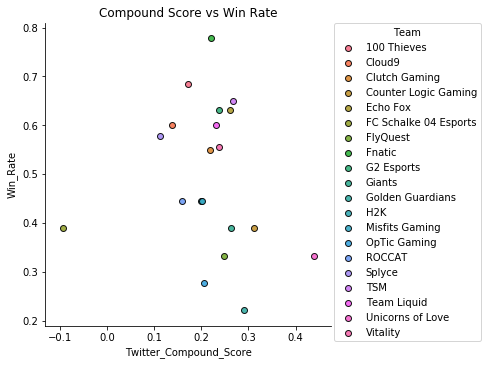

In [4]:
#Create bubble plot using seaborn and matplotlib libraries
sns.lmplot(x='Twitter_Compound_Score', y='Win_Rate', data=Merged_df,
           fit_reg=False,hue='Team'
           ,scatter_kws={ 
           "alpha":0.9,"linewidth":1,"edgecolors":'k'}) 

#Set title for the plot
ax = plt.gca()
ax.set_title("Compound Score vs Win Rate")
plt.show()

#ANALYSIS: if we visually break up this chart into quadrants, we're more interested in "less popular, but more successful teams"


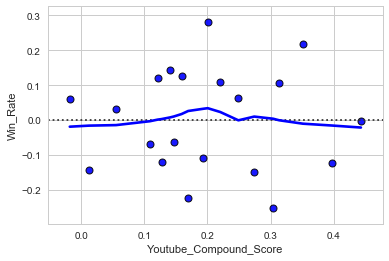

In [5]:
sns.set(style="whitegrid")

# Make an example dataset with y ~ x

x = Merged_df["Youtube_Compound_Score"]
y = Merged_df["Win_Rate"]

# Plot the residuals after fitting a linear model
sns.residplot(x, y, lowess=True,color="b", scatter_kws={ 
           "alpha":0.9,"linewidth":1,"edgecolors":'k'})
plt.show()            

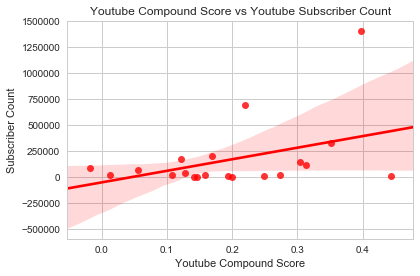

In [6]:
sns.regplot(x="Youtube_Compound_Score", y="Subscriber_Count", data=Merged_df,color="r")

plt.title("Youtube Compound Score vs Youtube Subscriber Count")
plt.xlabel("Youtube Compound Score")
plt.ylabel("Subscriber Count")

# Save our graph and show the grap
plt.tight_layout()
#plt.savefig("YoutubeComvsSub.png")
plt.show()

#ANALYSIS: Sentiment generally rises with higher viewership;
# Can have indirect inference that more viewers = higher avg sentiment => more popularity

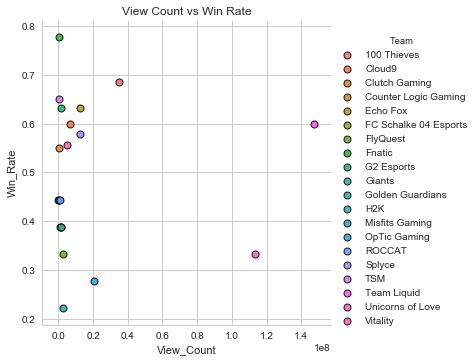

In [7]:
sns.lmplot(x='View_Count', y='Win_Rate', data=Merged_df,
           fit_reg=False,hue='Team'
           ,scatter_kws={ 
           "alpha":0.9,"linewidth":1,"edgecolors":'k'}) 

#Set title for the plot
ax = plt.gca()
ax.set_title("View Count vs Win Rate")
plt.show()

#ANALYSIS: Weak relationship; limitation of this is that team channels are not split between eSports segments

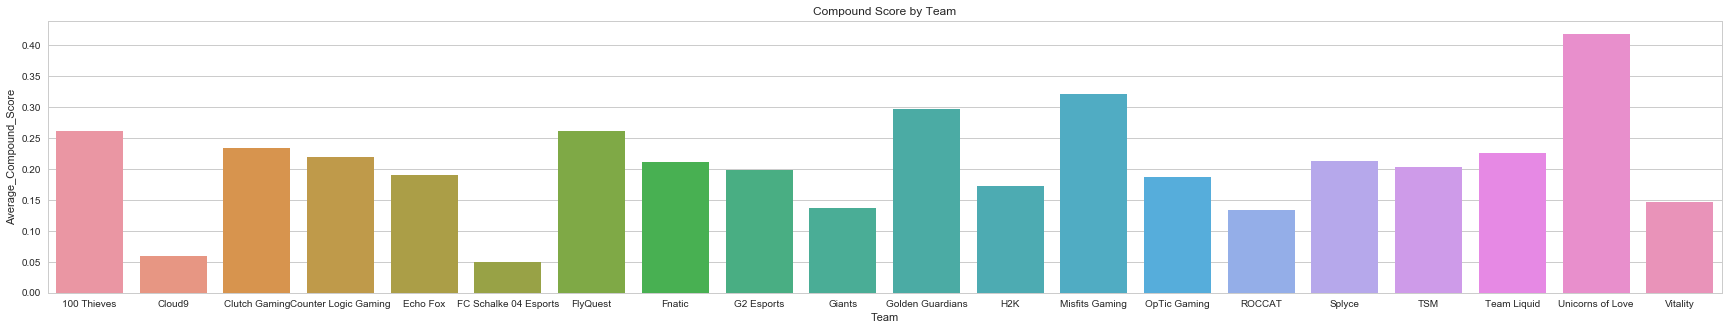

In [8]:
plt.subplots(figsize=(30,5))
sns.barplot(x="Team",y="Average_Compound_Score",data = Merged_df,
           
           )

#Set title for plot
ax = plt.gca()
ax.set_title("Compound Score by Team")
plt.show()

plt.savefig("CompoundScorebyTeam")
#ANALYSIS: Sentiment across teams is varied; According to Vader docs, anything above 0.05 is positive; 
#Cloud9 and FC Shalke fall in the neutral category

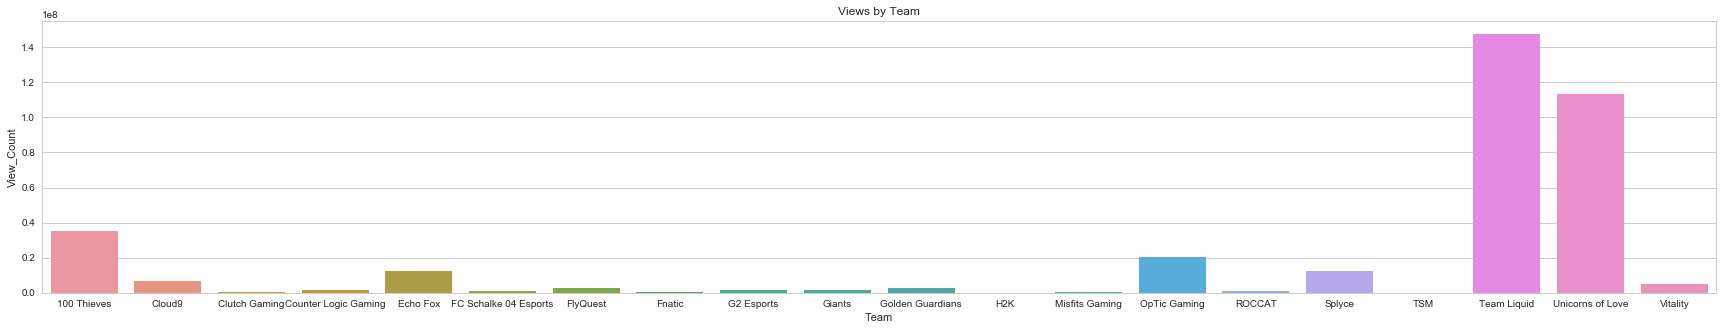

In [9]:
plt.subplots(figsize=(30,5))
sns.barplot(x="Team",y="View_Count",data = Merged_df,
           
           )

#Set title for plot
ax = plt.gca()
ax.set_title("Views by Team")
plt.show()
plt.savefig("ViewsbyTeam")